In [1]:
%matplotlib inline

import anndata
import gseapy
import matplotlib
from matplotlib import pyplot
import numpy
import os
import pandas
import seaborn
import sys

%load_ext rpy2.ipython

#import diffexpr
from diffexpr.py_deseq import py_DESeq2

pandas.set_option('max_rows', None)

print(f'Package versions:\nPython {sys.version}, anndata {anndata.__version__}, '
      f'diff_expr GitHub commit 0749fd3, gseapy {gseapy.__version__}, '
      f'matplotlib {matplotlib.__version__}, numpy {numpy.__version__}, pandas {pandas.__version__}, '
      f'seaborn {seaborn.__version__}')

Package versions:
Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0], anndata 0.7.5, diff_expr GitHub commit 0749fd3, gseapy 0.10.3, matplotlib 3.4.2, numpy 1.21.0, pandas 1.1.5, seaborn 0.11.1


In [2]:
adata = anndata.read('./anndata_obj.protein_coding.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 42 × 19601
    obs: 'monomer_or_pff', 'o2_status', 'Injection date', 'DOB', 'DOD', 'batch', 'exp_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mouse_id'
    var: 'common_name', 'Length', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'expressed'
    uns: 'batch_colors', 'exp_condition_colors', 'hvg', 'monomer_or_pff_colors', 'mouse_id_colors', 'o2_status_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logtpm_counts', 'logtpm_counts_bc', 'logtpm_scaled_counts', 'logtpm_scaled_counts_bc', 'normlog_counts', 'normlog_scaled_counts', 'raw_counts', 'raw_counts_bc', 'tpm_counts', 'tpm_counts_bc'


In [3]:
adata.X = adata.layers['raw_counts_bc']

In [4]:
adata.obs.head()

,monomer_or_pff,o2_status,Injection date,DOB,DOD,batch,exp_condition,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,mouse_id
159,PFF,normoxia,4/7/2022,12/7/2021,7/7/2022,1,PFF_normoxia,16973,13533468.0,503320.0,3.719076,m159
160,PFF,normoxia,4/7/2022,12/7/2021,7/7/2022,1,PFF_normoxia,17152,14720930.0,528591.0,3.590745,m160
161,PFF,normoxia,4/7/2022,12/7/2021,7/7/2022,1,PFF_normoxia,16977,13572026.0,479388.0,3.532177,m161
162,PFF,normoxia,4/7/2022,12/7/2021,7/7/2022,1,PFF_normoxia,16876,12945997.0,525013.0,4.055408,m162
163,PFF,hypoxia,4/7/2022,12/7/2021,7/7/2022,1,PFF_hypoxia,16861,12425746.0,507629.0,4.085300,m163


In [5]:
adata.var['unique_common_name'] = adata.var['common_name'].astype(str) + '_' + adata.var.index.values

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
adata[:, adata.var['expressed']].var.head()

,common_name,Length,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std,highly_variable,means,dispersions,dispersions_norm,expressed,unique_common_name
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000079410.4,Gm2897,1980,False,47,52.127660,0.0,2450.0,2.071994,0.148289,False,2.082687,-1.605233,0.113871,True,Gm2897_ENSMUSG00000079410.4
ENSMUSG00000051396.15,Gm45902,4347,False,47,109.361702,0.0,5140.0,2.029705,0.099796,False,2.034442,-2.508074,-0.919227,True,Gm45902_ENSMUSG00000051396.15
ENSMUSG00000079402.9,Gm3020,1940,False,47,98.255319,0.0,4618.0,2.652971,0.162504,False,2.666069,-0.838242,0.909404,True,Gm3020_ENSMUSG00000079402.9
ENSMUSG00000096793.7,Gm3002,2139,False,47,20.574468,0.0,967.0,1.252847,0.226925,False,1.279530,-1.138285,0.710638,True,Gm3002_ENSMUSG00000096793.7
ENSMUSG00000068240.5,Gm11808,504,False,47,121.723404,0.0,5721.0,4.145212,0.121184,False,4.152298,-0.085386,0.798912,True,Gm11808_ENSMUSG00000068240.5


In [7]:
def run_enrichr(test_res, description='enrichr',
                gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                           'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020',
                           'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X'], organism='Mouse',
                max_qval=0.01, fc_threshold=0,
                mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                mitocarta_background='mmusculus_gene_ensembl', pval_col='adj_pvals', log2fc_col='log2fc',
                gene_col='gene'):

    chatterjee_de_set = '../ref_data/chatterjee2022_de_gene_set.gmt'

    #upgoing genes
    upgoing_enrichr_results = None
    gene_list = [elt.split('_')[0] for elt in test_res[(test_res[pval_col] < max_qval)
                                                        & (test_res[log2fc_col] > fc_threshold)][gene_col]]
    if len(gene_list) == 0:
        print('No significant upgoing genes found.')
    else:
        #enrichr for built-in databases
        enr = gseapy.enrichr(gene_list=gene_list, description=description,
                             gene_sets=gene_sets, organism=organism, no_plot=True, outdir=None)
        builtin_enrichr_results = enr.results.copy()
        builtin_enrichr_results['direction'] = 'upgoing'
        #enrichr for custom mitocarta3.0
        enr = gseapy.enrichr(gene_list=gene_list, description=description + '_mitocarta3.0',
                             gene_sets=mitocarta_gmt_path, background=mitocarta_background,
                             organism=organism, no_plot=True, outdir=None)
        mitocarta_enrichr_results = enr.results.copy()
        mitocarta_enrichr_results['direction'] = 'upgoing'
        mitocarta_enrichr_results['Gene_set'] = os.path.splitext(os.path.basename(mitocarta_gmt_path))[0]

        #enrichr for Chatterjee et al. 2022 DE genes
        enr = gseapy.enrichr(gene_list=gene_list, description=description + '_chatterjee2022_de_genes',
                             gene_sets=chatterjee_de_set, background=mitocarta_background,
                             organism=organism, no_plot=True, outdir=None)
        chatterjee_enrichr_results = enr.results.copy()
        chatterjee_enrichr_results['direction'] = 'upgoing'
        chatterjee_enrichr_results['Gene_set'] = os.path.splitext(os.path.basename(chatterjee_de_set))[0]

        upgoing_enrichr_results = pandas.concat([builtin_enrichr_results, mitocarta_enrichr_results,
                                                 chatterjee_enrichr_results])

    #downgoing genes
    downgoing_enrichr_results = None
    gene_list = [elt.split('_')[0] for elt in test_res[(test_res[pval_col] < max_qval)
                                                       & (test_res[log2fc_col] < 0 - fc_threshold)][gene_col]]
    if len(gene_list) == 0:
        print('No significant downgoing genes found.')
    else:
        #enrichr for built-in databases
        enr = gseapy.enrichr(gene_list=gene_list, description=description,
                             gene_sets=gene_sets, organism=organism, no_plot=True, outdir=None)
        builtin_enrichr_results = enr.results.copy()
        builtin_enrichr_results['direction'] = 'downgoing'

        #enrichr for custom mitocarta3.0
        enr = gseapy.enrichr(gene_list=gene_list, description=description + '_mitocarta3.0',
                             gene_sets=mitocarta_gmt_path, background=mitocarta_background,
                             organism=organism, no_plot=True, outdir=None)
        mitocarta_enrichr_results = enr.results.copy()
        mitocarta_enrichr_results['direction'] = 'downgoing'
        mitocarta_enrichr_results['Gene_set'] = os.path.splitext(os.path.basename(mitocarta_gmt_path))[0]

        #enrichr for Chatterjee et al. 2022 DE genes
        enr = gseapy.enrichr(gene_list=gene_list, description=description + '_chatterjee2022_de_genes',
                             gene_sets=chatterjee_de_set, background=mitocarta_background,
                             organism=organism, no_plot=True, outdir=None)
        chatterjee_enrichr_results = enr.results.copy()
        chatterjee_enrichr_results['direction'] = 'downgoing'
        chatterjee_enrichr_results['Gene_set'] = os.path.splitext(os.path.basename(chatterjee_de_set))[0]

        downgoing_enrichr_results = pandas.concat([builtin_enrichr_results, mitocarta_enrichr_results,
                                                   chatterjee_enrichr_results])

    if upgoing_enrichr_results is None and downgoing_enrichr_results is None:
        enrichr_results = None
    else:
        if upgoing_enrichr_results is None:
            enrichr_results = downgoing_enrichr_results
        elif downgoing_enrichr_results is None:
            enrichr_results = upgoing_enrichr_results
        else:
            enrichr_results = pandas.concat([upgoing_enrichr_results, downgoing_enrichr_results])
        enrichr_results['description'] = description

    return enrichr_results

### Test the four different experimental conditions

In [8]:
data_df = pandas.DataFrame(data=adata[:, adata.var['expressed']].layers['raw_counts_bc'].copy(), 
                           index=adata[:, adata.var['expressed']].obs['mouse_id'].copy().astype('object'),
                           columns=adata[:, adata.var['expressed']].var['unique_common_name'].copy().astype('object')).T
data_df['unique_common_name'] = data_df.index

sample_df = adata.obs.copy()[['mouse_id', 'exp_condition']]
sample_df.index = sample_df['mouse_id']

dds = py_DESeq2(count_matrix = data_df,
                design_matrix = sample_df,
                design_formula = '~ exp_condition',
                gene_column = 'unique_common_name') # <- telling DESeq2 this should be the gene ID column

dds.run_deseq(minReplicatesForReplace=1e6)

In [9]:
%%R

sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /broad/moothalab/sandbox/tdurham/anaconda/envs/sc_remake2/lib/libopenblasp-r0.3.10.so

locale:
[1] C

attached base packages:
 [1] parallel  stats4    tools     stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] DESeq2_1.30.1               SummarizedExperiment_1.20.0
 [3] Biobase_2.50.0              MatrixGenerics_1.2.1       
 [5] matrixStats_0.59.0          GenomicRanges_1.42.0       
 [7] GenomeInfoDb_1.26.7         IRanges_2.24.1             
 [9] S4Vectors_0.28.1            BiocGenerics_0.36.1        

loaded via a namespace (and not attached):
 [1] genefilter_1.72.1      locfit_1.5-9.4         splines_4.0.5         
 [4] lattice_0.20-44        colorspace_2.0-2       vctrs_0.6.4           
 [7] utf8_1.2.1             blob_1.2.1             XML_3.99-0.6         

#### monomer hypoxia vs monomer normoxia

In [10]:
#dds.get_deseq_result(contrast=['exp_condition','monomer_hypoxia','monomer_normoxia'], cooksCutoff=2.0)
dds.get_deseq_result(contrast=['exp_condition','monomer_hypoxia','monomer_normoxia'])
res = dds.deseq_result
res['log2FC_magnitude'] = numpy.absolute(res['log2FoldChange'])
res.sort_values(by=['padj', 'log2FC_magnitude'], ascending=[True, False]).head(50)

INFO:DESeq2:Using contrast: ['exp_condition', 'monomer_hypoxia', 'monomer_normoxia']


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
Vegfa_ENSMUSG00000023951.17,2768.039854,0.898524,0.051168,17.560285,4.962571e-69,6.575406e-65,Vegfa_ENSMUSG00000023951.17,0.898524
Kdr_ENSMUSG00000062960.10,281.581207,1.158002,0.094026,12.315750,7.451889e-35,4.936876e-31,Kdr_ENSMUSG00000062960.10,1.158002
Dnajb1_ENSMUSG00000005483.10,1230.533187,-0.858708,0.075564,-11.363926,6.323711e-30,2.792973e-26,Dnajb1_ENSMUSG00000005483.10,0.858708
Ccdc117_ENSMUSG00000020482.4,431.345263,-0.803422,0.072803,-11.035626,2.572524e-28,8.521486e-25,Ccdc117_ENSMUSG00000020482.4,0.803422
Cxcl12_ENSMUSG00000061353.11,762.828855,1.365649,0.124857,10.937745,7.606868e-28,2.015820e-24,Cxcl12_ENSMUSG00000061353.11,1.365649
Slc6a6_ENSMUSG00000030096.8,1989.177707,0.421033,0.045818,9.189289,3.954464e-20,8.732775e-17,Slc6a6_ENSMUSG00000030096.8,0.421033
Hsph1_ENSMUSG00000029657.15,4310.264090,-0.648867,0.071084,-9.128178,6.966199e-20,1.318602e-16,Hsph1_ENSMUSG00000029657.15,0.648867
Ahsa2_ENSMUSG00000020288.13,609.579248,-0.709396,0.080036,-8.863514,7.753131e-19,1.141433e-15,Ahsa2_ENSMUSG00000020288.13,0.709396
Abcc9_ENSMUSG00000030249.15,252.263130,0.622233,0.070142,8.871026,7.247478e-19,1.141433e-15,Abcc9_ENSMUSG00000030249.15,0.622233
Prss35_ENSMUSG00000033491.13,167.728685,0.825576,0.094714,8.716539,2.868359e-18,3.800576e-15,Prss35_ENSMUSG00000033491.13,0.825576


In [11]:
res['common_name'] = [elt.split('_')[0] for elt in res['unique_common_name']]

In [12]:
pandas.concat([res.set_index('common_name').sort_values(by='stat', ascending=False).head(15),
               res.set_index('common_name').sort_values(by='stat', ascending=False).tail(15)])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Vegfa,2768.039854,0.898524,0.051168,17.560285,4.962571e-69,6.575406e-65,Vegfa_ENSMUSG00000023951.17,0.898524
Kdr,281.581207,1.158002,0.094026,12.315750,7.451889e-35,4.936876e-31,Kdr_ENSMUSG00000062960.10,1.158002
Cxcl12,762.828855,1.365649,0.124857,10.937745,7.606868e-28,2.015820e-24,Cxcl12_ENSMUSG00000061353.11,1.365649
Slc6a6,1989.177707,0.421033,0.045818,9.189289,3.954464e-20,8.732775e-17,Slc6a6_ENSMUSG00000030096.8,0.421033
Abcc9,252.263130,0.622233,0.070142,8.871026,7.247478e-19,1.141433e-15,Abcc9_ENSMUSG00000030249.15,0.622233
Prss35,167.728685,0.825576,0.094714,8.716539,2.868359e-18,3.800576e-15,Prss35_ENSMUSG00000033491.13,0.825576
Mcam,1022.794068,0.697937,0.083932,8.315537,9.133783e-17,9.309433e-14,Mcam_ENSMUSG00000032135.15,0.697937
Casq2,84.396713,0.901352,0.111895,8.055362,7.924423e-16,6.998840e-13,Casq2_ENSMUSG00000027861.13,0.901352
Slc22a8,297.517097,0.848272,0.105408,8.047483,8.451429e-16,6.998840e-13,Slc22a8_ENSMUSG00000063796.9,0.848272


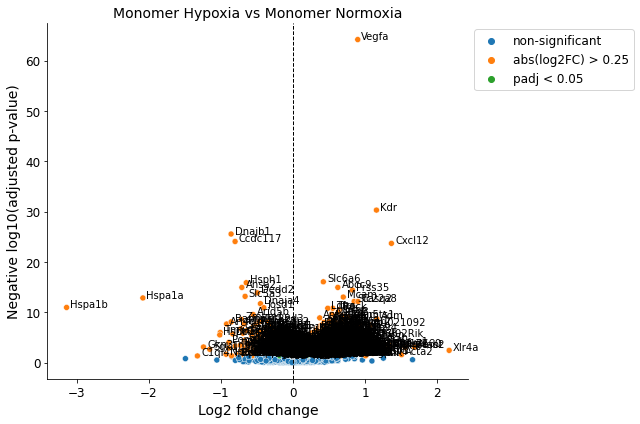

In [13]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
to_annotate = res[res['padj'] < 0.05]
for idx in range(to_annotate.shape[0]):
    vals = to_annotate.iloc[idx]
    axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('Monomer Hypoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.mono_hyp_vs_mono_norm.volcano.pdf')

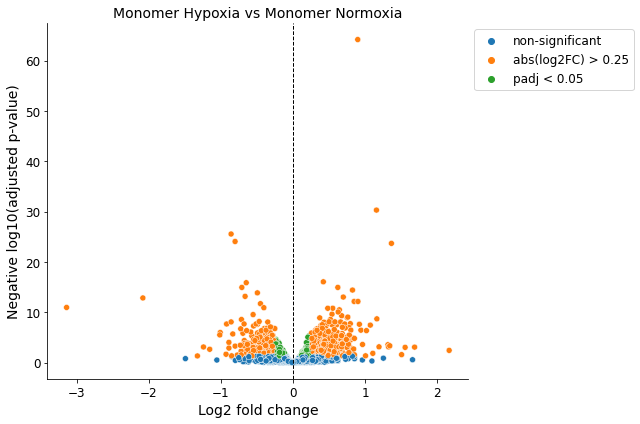

In [14]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
#to_annotate = res[res['padj'] < 0.05]
#for idx in range(to_annotate.shape[0]):
#    vals = to_annotate.iloc[idx]
#   axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('Monomer Hypoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.mono_hyp_vs_mono_norm.volcano.unlabeled.pdf')

In [15]:
#res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.MonomerHypoxia_vs_MonomerNormoxia.csv')

In [16]:
enrichr_res = run_enrichr(res, description='Monomer Hypoxia vs Monomer Normoxia',
                          gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                          'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020'], organism='Mouse',
                          max_qval=0.05, fc_threshold=0.25,
                          mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                          mitocarta_background='mmusculus_gene_ensembl', pval_col='padj', log2fc_col='log2FoldChange',
                          gene_col='unique_common_name')
print(enrichr_res.shape)
enrichr_res.head()

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: Monomer Hypoxia vs Monomer Normoxia, Enrichr Library: GO_Biological_Process_2021
INFO:gseapy:Analysis name: Monomer Hypoxia vs Monomer Normoxia, Enrichr Library: KEGG_2019_Mouse
INFO:gseapy:Analysis name: Monomer Hypoxia vs Monomer Normoxia, Enrichr Library: MGI_Mammalian_Phenotype_Level_4_2021
INFO:gseapy:Analysis name: Monomer Hypoxia vs Monomer Normoxia, Enrichr Library: MSigDB_Hallmark_2020
INFO:gseapy:User Defined gene sets is given: ../ref_data/Mouse.MitoPathways3.0.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:Background: found 20618 genes
INFO:gseapy:User Defined gene sets is given: ../ref_data/chatterjee2022_de_gene_set.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmus

(9465, 12)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,direction,description
0,GO_Biological_Process_2021,vasculogenesis (GO:0001570),13/33,5.246657e-12,1.614921e-08,0.0,0.0,21.236256,551.578416,PDGFRB;EGFL7;NOTCH1;TGFB1;CAV1;ADM;TGFBR2;VEGF...,upgoing,Monomer Hypoxia vs Monomer Normoxia
1,GO_Biological_Process_2021,extracellular matrix organization (GO:0030198),34/300,4.067143e-11,6.259333e-08,0.0,0.0,4.274357,102.266113,DDR1;ITGB4;ELN;ITGB3;ICAM2;NOXO1;CAPG;NID2;LOX...,upgoing,Monomer Hypoxia vs Monomer Normoxia
2,GO_Biological_Process_2021,regulation of cell population proliferation (G...,58/764,1.271805e-10,1.304872e-07,0.0,0.0,2.801596,63.835531,ACVRL1;FLT1;TFRC;ELN;TGFB1I1;FLT4;HILPDA;HMGB2...,upgoing,Monomer Hypoxia vs Monomer Normoxia
3,GO_Biological_Process_2021,extracellular structure organization (GO:0043062),27/216,4.779464e-10,3.266362e-07,0.0,0.0,4.738465,101.694680,DDR1;ITGB4;ELN;ITGB3;ICAM2;NID2;LOXL1;ADAMTS16...,upgoing,Monomer Hypoxia vs Monomer Normoxia
4,GO_Biological_Process_2021,external encapsulating structure organization ...,27/217,5.305981e-10,3.266362e-07,0.0,0.0,4.713281,100.661611,DDR1;ITGB4;ELN;ITGB3;ICAM2;NID2;LOXL1;ADAMTS16...,upgoing,Monomer Hypoxia vs Monomer Normoxia


In [17]:
disp_cols = ['direction', 'Gene_set', 'Term', 'Adjusted P-value']
(enrichr_res[enrichr_res['Adjusted P-value'] < 0.05]
 .sort_values(by=['direction', 'Gene_set', 'Adjusted P-value'],
              ascending=[False, True, True])
 .groupby(['Gene_set', 'Genes']).head(1)
 .groupby(['Gene_set', 'direction'])[disp_cols].head())

,direction,Gene_set,Term,Adjusted P-value
0,upgoing,GO_Biological_Process_2021,vasculogenesis (GO:0001570),1.614921e-08
1,upgoing,GO_Biological_Process_2021,extracellular matrix organization (GO:0030198),6.259333e-08
2,upgoing,GO_Biological_Process_2021,regulation of cell population proliferation (G...,1.304872e-07
3,upgoing,GO_Biological_Process_2021,extracellular structure organization (GO:0043062),3.266362e-07
5,upgoing,GO_Biological_Process_2021,blood vessel morphogenesis (GO:0048514),4.363278e-07
3078,upgoing,KEGG_2019_Mouse,Pathways in cancer,9.595906e-05
3079,upgoing,KEGG_2019_Mouse,Focal adhesion,9.595906e-05
3080,upgoing,KEGG_2019_Mouse,PI3K-Akt signaling pathway,4.141805e-04
3081,upgoing,KEGG_2019_Mouse,ECM-receptor interaction,2.621016e-03
3082,upgoing,KEGG_2019_Mouse,Proteoglycans in cancer,8.215587e-03


In [18]:
#enrichr_res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.MonomerHypoxia_vs_MonomerNormoxia.enrichr_results.padjlt0.05.fcgt0.25.csv')

#### PFF hypoxia vs PFF normoxia

In [19]:
#dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','PFF_normoxia'], cooksCutoff=2.0)
dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','PFF_normoxia'])
res = dds.deseq_result
res['log2FC_magnitude'] = numpy.absolute(res['log2FoldChange'])
res.sort_values(by=['padj', 'log2FC_magnitude'], ascending=[True, False]).head(50)

INFO:DESeq2:Using contrast: ['exp_condition', 'PFF_hypoxia', 'PFF_normoxia']


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
Vegfa_ENSMUSG00000023951.17,2768.039854,0.940983,0.048870,19.254957,1.282814e-82,1.699728e-78,Vegfa_ENSMUSG00000023951.17,0.940983
Kdr_ENSMUSG00000062960.10,281.581207,0.971353,0.090111,10.779462,4.303936e-27,2.851357e-23,Kdr_ENSMUSG00000062960.10,0.971353
Prss35_ENSMUSG00000033491.13,167.728685,0.829240,0.090741,9.138551,6.329488e-20,2.795524e-16,Prss35_ENSMUSG00000033491.13,0.829240
Ldha_ENSMUSG00000063229.15,2300.521208,0.536408,0.060348,8.888642,6.186002e-19,2.049113e-15,Ldha_ENSMUSG00000063229.15,0.536408
Sfrp5_ENSMUSG00000018822.7,310.969106,-0.733928,0.085089,-8.625403,6.386715e-18,1.692479e-14,Sfrp5_ENSMUSG00000018822.7,0.733928
Abcc9_ENSMUSG00000030249.15,252.263130,0.582545,0.068069,8.558096,1.147465e-17,2.533985e-14,Abcc9_ENSMUSG00000030249.15,0.582545
Casq2_ENSMUSG00000027861.13,84.396713,0.905676,0.108702,8.331733,7.966720e-17,1.507986e-13,Casq2_ENSMUSG00000027861.13,0.905676
Cxcl12_ENSMUSG00000061353.11,762.828855,0.924972,0.118851,7.782605,7.104597e-15,1.176699e-11,Cxcl12_ENSMUSG00000061353.11,0.924972
Pfkl_ENSMUSG00000020277.10,2728.598936,0.405307,0.057852,7.005968,2.452835e-12,3.611118e-09,Pfkl_ENSMUSG00000020277.10,0.405307
Adm_ENSMUSG00000030790.15,38.865089,1.117964,0.166344,6.720813,1.807130e-11,2.394448e-08,Adm_ENSMUSG00000030790.15,1.117964


In [20]:
res['common_name'] = [elt.split('_')[0] for elt in res['unique_common_name']]

In [21]:
pandas.concat([res[~res['pvalue'].isnull()].set_index('common_name').sort_values(by='stat', ascending=False).head(15),
               res[~res['pvalue'].isnull()].set_index('common_name').sort_values(by='stat', ascending=False).tail(15)])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Vegfa,2768.039854,0.940983,0.048870,19.254957,1.282814e-82,1.699728e-78,Vegfa_ENSMUSG00000023951.17,0.940983
Kdr,281.581207,0.971353,0.090111,10.779462,4.303936e-27,2.851357e-23,Kdr_ENSMUSG00000062960.10,0.971353
Prss35,167.728685,0.829240,0.090741,9.138551,6.329488e-20,2.795524e-16,Prss35_ENSMUSG00000033491.13,0.829240
Ldha,2300.521208,0.536408,0.060348,8.888642,6.186002e-19,2.049113e-15,Ldha_ENSMUSG00000063229.15,0.536408
Abcc9,252.263130,0.582545,0.068069,8.558096,1.147465e-17,2.533985e-14,Abcc9_ENSMUSG00000030249.15,0.582545
Casq2,84.396713,0.905676,0.108702,8.331733,7.966720e-17,1.507986e-13,Casq2_ENSMUSG00000027861.13,0.905676
Cxcl12,762.828855,0.924972,0.118851,7.782605,7.104597e-15,1.176699e-11,Cxcl12_ENSMUSG00000061353.11,0.924972
Pfkl,2728.598936,0.405307,0.057852,7.005968,2.452835e-12,3.611118e-09,Pfkl_ENSMUSG00000020277.10,0.405307
Adm,38.865089,1.117964,0.166344,6.720813,1.807130e-11,2.394448e-08,Adm_ENSMUSG00000030790.15,1.117964


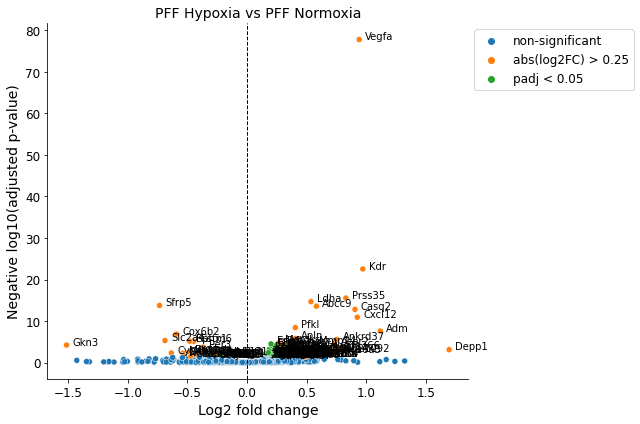

In [22]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
to_annotate = res[res['padj'] < 0.05]
for idx in range(to_annotate.shape[0]):
    vals = to_annotate.iloc[idx]
    axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Hypoxia vs PFF Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_pff_norm.volcano.pdf')

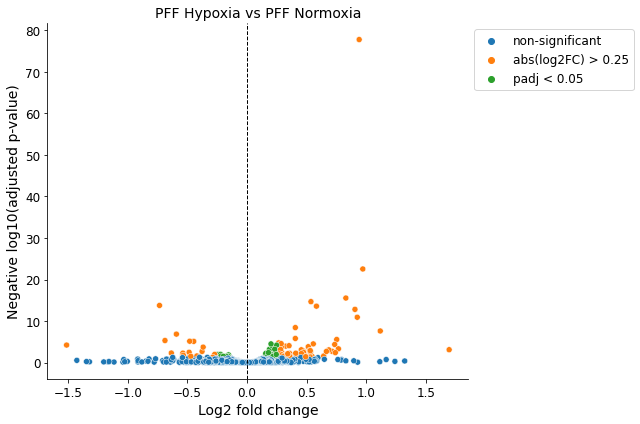

In [23]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
#to_annotate = res[res['padj'] < 0.05]
#for idx in range(to_annotate.shape[0]):
#    vals = to_annotate.iloc[idx]
#   axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Hypoxia vs PFF Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_pff_norm.volcano.unlabeled.pdf')

In [24]:
#res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_PFFNormoxia.csv')

In [25]:
enrichr_res = run_enrichr(res, description='PFF Hypoxia vs PFF Normoxia',
                          gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                          'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020'], organism='Mouse',
                          max_qval=0.05, fc_threshold=0.25,
                          mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                          mitocarta_background='mmusculus_gene_ensembl', pval_col='padj', log2fc_col='log2FoldChange',
                          gene_col='unique_common_name')
print(enrichr_res.shape)
enrichr_res.head()

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: PFF Hypoxia vs PFF Normoxia, Enrichr Library: GO_Biological_Process_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs PFF Normoxia, Enrichr Library: KEGG_2019_Mouse
INFO:gseapy:Analysis name: PFF Hypoxia vs PFF Normoxia, Enrichr Library: MGI_Mammalian_Phenotype_Level_4_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs PFF Normoxia, Enrichr Library: MSigDB_Hallmark_2020
INFO:gseapy:User Defined gene sets is given: ../ref_data/Mouse.MitoPathways3.0.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:Background: found 20618 genes
INFO:gseapy:User Defined gene sets is given: ../ref_data/chatterjee2022_de_gene_set.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:B

(2468, 12)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,direction,description
0,GO_Biological_Process_2021,blood vessel morphogenesis (GO:0048514),8/56,5.566402e-11,6.173140e-08,0.0,0.0,46.000000,1086.137610,FLT1;FLT4;CAV1;KDR;LRP5;ADM;SMAD7;VEGFA,upgoing,PFF Hypoxia vs PFF Normoxia
1,GO_Biological_Process_2021,positive regulation of cellular process (GO:00...,14/625,1.649704e-07,8.471996e-05,0.0,0.0,6.703516,104.692166,FLT1;CITED2;CAV1;FLT4;LRP5;ADRA2A;VEGFA;ACER2;...,upgoing,PFF Hypoxia vs PFF Normoxia
2,GO_Biological_Process_2021,cellular response to vascular endothelial grow...,5/34,2.291793e-07,8.471996e-05,0.0,0.0,45.726437,699.100566,FLT1;FLT4;KDR;GAS1;VEGFA,upgoing,PFF Hypoxia vs PFF Normoxia
3,GO_Biological_Process_2021,regulation of cell population proliferation (G...,14/764,1.818605e-06,5.042082e-04,0.0,0.0,5.421818,71.662562,BTG1;FLT1;FLT4;LRP5;ADRA2A;VEGFA;ACER2;CLDN5;E...,upgoing,PFF Hypoxia vs PFF Normoxia
4,GO_Biological_Process_2021,mammary gland development (GO:0030879),4/24,2.372566e-06,5.237578e-04,0.0,0.0,52.368421,678.251615,CAV1;NOTCH4;APLN;VEGFA,upgoing,PFF Hypoxia vs PFF Normoxia


In [26]:
disp_cols = ['direction', 'Gene_set', 'Term', 'Adjusted P-value', 'Genes']
(enrichr_res[enrichr_res['Adjusted P-value'] < 0.05]
 .sort_values(by=['direction', 'Gene_set', 'Adjusted P-value'],
              ascending=[False, True, True])
 .groupby(['Gene_set', 'Genes']).head(1)
 .groupby(['Gene_set', 'direction'])[disp_cols].head())

,direction,Gene_set,Term,Adjusted P-value,Genes
0,upgoing,GO_Biological_Process_2021,blood vessel morphogenesis (GO:0048514),6.173140e-08,FLT1;FLT4;CAV1;KDR;LRP5;ADM;SMAD7;VEGFA
1,upgoing,GO_Biological_Process_2021,positive regulation of cellular process (GO:00...,8.471996e-05,FLT1;CITED2;CAV1;FLT4;LRP5;ADRA2A;VEGFA;ACER2;...
2,upgoing,GO_Biological_Process_2021,cellular response to vascular endothelial grow...,8.471996e-05,FLT1;FLT4;KDR;GAS1;VEGFA
3,upgoing,GO_Biological_Process_2021,regulation of cell population proliferation (G...,5.042082e-04,BTG1;FLT1;FLT4;LRP5;ADRA2A;VEGFA;ACER2;CLDN5;E...
4,upgoing,GO_Biological_Process_2021,mammary gland development (GO:0030879),5.237578e-04,CAV1;NOTCH4;APLN;VEGFA
1109,upgoing,KEGG_2019_Mouse,HIF-1 signaling pathway,7.549458e-03,LDHA;PFKL;FLT1;VEGFA;PDK1
1110,upgoing,KEGG_2019_Mouse,Central carbon metabolism in cancer,7.790602e-03,LDHA;PFKL;SLC16A3;PDK1
1111,upgoing,KEGG_2019_Mouse,Rap1 signaling pathway,7.912574e-03,FLT1;ADORA2A;FLT4;KDR;GNAS;VEGFA
1112,upgoing,KEGG_2019_Mouse,Focal adhesion,3.777229e-02,FLT1;CAV1;FLT4;KDR;VEGFA
1233,upgoing,MGI_Mammalian_Phenotype_Level_4_2021,hydrops fetalis MP:0002192,1.179151e-03,CITED2;FLT4;GNAS;ADM;SOX4


In [27]:
#enrichr_res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_PFFNormoxia.enrichr_results.padjlt0.05.fcgt0.25.csv')

#### PFF normoxia vs monomer normoxia

In [28]:
#dds.get_deseq_result(contrast=['exp_condition','PFF_normoxia','monomer_normoxia'], cooksCutoff=2.0)
dds.get_deseq_result(contrast=['exp_condition','PFF_normoxia','monomer_normoxia'])
res = dds.deseq_result
res['log2FC_magnitude'] = numpy.absolute(res['log2FoldChange'])
res.sort_values(by=['padj', 'log2FC_magnitude'], ascending=[True, False]).head(50)

INFO:DESeq2:Using contrast: ['exp_condition', 'PFF_normoxia', 'monomer_normoxia']


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
Ccdc117_ENSMUSG00000020482.4,431.345263,-0.701529,0.067235,-10.434010,1.734126e-25,2.297717e-21,Ccdc117_ENSMUSG00000020482.4,0.701529
Dnajb1_ENSMUSG00000005483.10,1230.533187,-0.707406,0.070005,-10.105019,5.248544e-24,3.477160e-20,Dnajb1_ENSMUSG00000005483.10,0.707406
Dedd2_ENSMUSG00000054499.9,434.414535,-0.457974,0.053437,-8.570385,1.031398e-17,4.555339e-14,Dedd2_ENSMUSG00000054499.9,0.457974
Arid5b_ENSMUSG00000019947.10,617.675707,-0.601890,0.071273,-8.444821,3.045108e-17,1.008692e-13,Arid5b_ENSMUSG00000019947.10,0.601890
Ahsa2_ENSMUSG00000020288.13,609.579248,-0.618238,0.074125,-8.340532,7.395695e-17,1.959859e-13,Ahsa2_ENSMUSG00000020288.13,0.618238
P4ha1_ENSMUSG00000019916.14,999.383998,-0.691507,0.085110,-8.124897,4.477439e-16,9.887678e-13,P4ha1_ENSMUSG00000019916.14,0.691507
Cirbp_ENSMUSG00000045193.13,1580.386954,0.618913,0.078859,7.848342,4.215724e-15,7.979763e-12,Cirbp_ENSMUSG00000045193.13,0.618913
Slc5a3_ENSMUSG00000089774.2,859.709916,-0.568407,0.073647,-7.717968,1.181989e-14,1.957669e-11,Slc5a3_ENSMUSG00000089774.2,0.568407
Lrrc29_ENSMUSG00000041679.9,55.126915,0.816032,0.112671,7.242613,4.401221e-13,6.479575e-10,Lrrc29_ENSMUSG00000041679.9,0.816032
Hsph1_ENSMUSG00000029657.15,4310.264090,-0.475864,0.065967,-7.213711,5.444730e-13,7.214267e-10,Hsph1_ENSMUSG00000029657.15,0.475864


In [29]:
res['common_name'] = [elt.split('_')[0] for elt in res['unique_common_name']]

In [30]:
pandas.concat([res.set_index('common_name').sort_values(by='stat', ascending=False).head(15),
               res.set_index('common_name').sort_values(by='stat', ascending=False).tail(15)])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Cirbp,1580.386954,0.618913,0.078859,7.848342,4.215724e-15,7.979763e-12,Cirbp_ENSMUSG00000045193.13,0.618913
Lrrc29,55.126915,0.816032,0.112671,7.242613,4.401221e-13,6.479575e-10,Lrrc29_ENSMUSG00000041679.9,0.816032
Ankrd16,788.171752,0.323726,0.049553,6.532928,6.449621e-11,6.104106e-08,Ankrd16_ENSMUSG00000047909.11,0.323726
Zfp867,211.738582,0.418782,0.065537,6.390005,1.658804e-10,1.465276e-07,Zfp867_ENSMUSG00000054519.8,0.418782
Tet2,772.737393,0.330754,0.052228,6.332836,2.406952e-10,1.993257e-07,Tet2_ENSMUSG00000040943.12,0.330754
Hmgb2,158.276174,0.497906,0.079915,6.230426,4.651682e-10,2.982295e-07,Hmgb2_ENSMUSG00000054717.7,0.497906
Tceanc,67.629903,0.590819,0.094866,6.227921,4.726656e-10,2.982295e-07,Tceanc_ENSMUSG00000051224.13,0.590819
Hnrnpdl,3367.875963,0.258386,0.041560,6.217226,5.060198e-10,3.047620e-07,Hnrnpdl_ENSMUSG00000029328.15,0.258386
4931406C07Rik,594.013369,0.310052,0.050326,6.160860,7.235110e-10,4.168052e-07,4931406C07Rik_ENSMUSG00000031938.15,0.310052


In [31]:
print(numpy.sum((res['log2FoldChange'] > 0) & (res['padj'] < 0.05)))
res[res['log2FoldChange'] > 0].set_index('common_name').sort_values(by='stat', ascending=False).head(50)

551


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Cirbp,1580.386954,0.618913,0.078859,7.848342,4.215724e-15,7.979763e-12,Cirbp_ENSMUSG00000045193.13,0.618913
Lrrc29,55.126915,0.816032,0.112671,7.242613,4.401221e-13,6.479575e-10,Lrrc29_ENSMUSG00000041679.9,0.816032
Ankrd16,788.171752,0.323726,0.049553,6.532928,6.449621e-11,6.104106e-08,Ankrd16_ENSMUSG00000047909.11,0.323726
Zfp867,211.738582,0.418782,0.065537,6.390005,1.658804e-10,1.465276e-07,Zfp867_ENSMUSG00000054519.8,0.418782
Tet2,772.737393,0.330754,0.052228,6.332836,2.406952e-10,1.993257e-07,Tet2_ENSMUSG00000040943.12,0.330754
Hmgb2,158.276174,0.497906,0.079915,6.230426,4.651682e-10,2.982295e-07,Hmgb2_ENSMUSG00000054717.7,0.497906
Tceanc,67.629903,0.590819,0.094866,6.227921,4.726656e-10,2.982295e-07,Tceanc_ENSMUSG00000051224.13,0.590819
Hnrnpdl,3367.875963,0.258386,0.041560,6.217226,5.060198e-10,3.047620e-07,Hnrnpdl_ENSMUSG00000029328.15,0.258386
4931406C07Rik,594.013369,0.310052,0.050326,6.160860,7.235110e-10,4.168052e-07,4931406C07Rik_ENSMUSG00000031938.15,0.310052


In [32]:
print(numpy.sum((res['log2FoldChange'] < 0) & (res['padj'] < 0.05)))
res[res['log2FoldChange'] < 0].set_index('common_name').sort_values(by='stat', ascending=True).head(50)

556


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Ccdc117,431.345263,-0.701529,0.067235,-10.434010,1.734126e-25,2.297717e-21,Ccdc117_ENSMUSG00000020482.4,0.701529
Dnajb1,1230.533187,-0.707406,0.070005,-10.105019,5.248544e-24,3.477160e-20,Dnajb1_ENSMUSG00000005483.10,0.707406
Dedd2,434.414535,-0.457974,0.053437,-8.570385,1.031398e-17,4.555339e-14,Dedd2_ENSMUSG00000054499.9,0.457974
Arid5b,617.675707,-0.601890,0.071273,-8.444821,3.045108e-17,1.008692e-13,Arid5b_ENSMUSG00000019947.10,0.601890
Ahsa2,609.579248,-0.618238,0.074125,-8.340532,7.395695e-17,1.959859e-13,Ahsa2_ENSMUSG00000020288.13,0.618238
P4ha1,999.383998,-0.691507,0.085110,-8.124897,4.477439e-16,9.887678e-13,P4ha1_ENSMUSG00000019916.14,0.691507
Slc5a3,859.709916,-0.568407,0.073647,-7.717968,1.181989e-14,1.957669e-11,Slc5a3_ENSMUSG00000089774.2,0.568407
Hsph1,4310.264090,-0.475864,0.065967,-7.213711,5.444730e-13,7.214267e-10,Hsph1_ENSMUSG00000029657.15,0.475864
Josd1,529.994202,-0.342566,0.048756,-7.026106,2.123776e-12,2.558185e-09,Josd1_ENSMUSG00000022426.6,0.342566


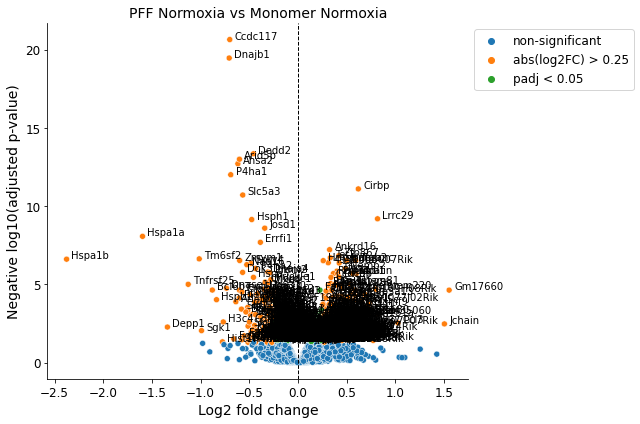

In [33]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
to_annotate = res[res['padj'] < 0.05]
for idx in range(to_annotate.shape[0]):
    vals = to_annotate.iloc[idx]
    axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Normoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_mono_norm.volcano.pdf')

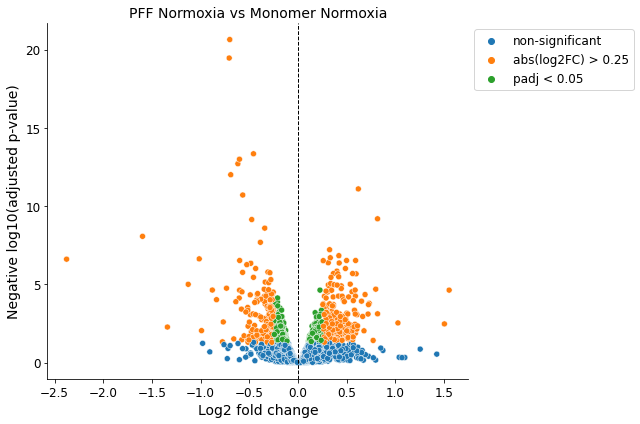

In [34]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
#to_annotate = res[res['padj'] < 0.05]
#for idx in range(to_annotate.shape[0]):
#    vals = to_annotate.iloc[idx]
#   axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Normoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_mono_norm.volcano.unlabeled.pdf')

In [35]:
#res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFNormoxia_vs_MonomerNormoxia.csv')

In [36]:
enrichr_res = run_enrichr(res, description='PFF Normoxia vs Monomer Normoxia',
                          gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                          'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020'], organism='Mouse',
                          max_qval=0.05, fc_threshold=0.25,
                          mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                          mitocarta_background='mmusculus_gene_ensembl', pval_col='padj', log2fc_col='log2FoldChange',
                          gene_col='unique_common_name')
print(enrichr_res.shape)
enrichr_res.head()

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: PFF Normoxia vs Monomer Normoxia, Enrichr Library: GO_Biological_Process_2021
INFO:gseapy:Analysis name: PFF Normoxia vs Monomer Normoxia, Enrichr Library: KEGG_2019_Mouse
INFO:gseapy:Analysis name: PFF Normoxia vs Monomer Normoxia, Enrichr Library: MGI_Mammalian_Phenotype_Level_4_2021
INFO:gseapy:Analysis name: PFF Normoxia vs Monomer Normoxia, Enrichr Library: MSigDB_Hallmark_2020
INFO:gseapy:User Defined gene sets is given: ../ref_data/Mouse.MitoPathways3.0.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:Background: found 20618 genes
INFO:gseapy:User Defined gene sets is given: ../ref_data/chatterjee2022_de_gene_set.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_e

(5607, 12)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,direction,description
0,GO_Biological_Process_2021,negative regulation of DNA-binding transcripti...,10/143,0.000026,0.036764,0.0,0.0,5.645147,59.606122,SIGIRR;SFRP4;HEYL;SP100;RWDD3;AIM2;NFKBIL1;SFR...,upgoing,PFF Normoxia vs Monomer Normoxia
1,GO_Biological_Process_2021,regulation of lipopolysaccharide-mediated sign...,4/21,0.000165,0.116489,0.0,0.0,17.371227,151.345127,SIGIRR;TRIM5;NFKBIL1;CD180,upgoing,PFF Normoxia vs Monomer Normoxia
2,GO_Biological_Process_2021,tRNA methylation (GO:0030488),4/34,0.001110,0.267726,0.0,0.0,9.837203,66.923658,THUMPD2;TRMT13;LCMT2;TRDMT1,upgoing,PFF Normoxia vs Monomer Normoxia
3,GO_Biological_Process_2021,regulation of isotype switching (GO:0045191),3/16,0.001209,0.267726,0.0,0.0,16.977038,114.051199,PARP3;TFRC;SHLD3,upgoing,PFF Normoxia vs Monomer Normoxia
4,GO_Biological_Process_2021,RNA methylation (GO:0001510),5/60,0.001309,0.267726,0.0,0.0,6.723855,44.636458,NSUN3;THUMPD2;TRMT13;LCMT2;TRDMT1,upgoing,PFF Normoxia vs Monomer Normoxia


In [37]:
disp_cols = ['direction', 'Gene_set', 'Term', 'Adjusted P-value', 'Genes']
(enrichr_res[enrichr_res['Adjusted P-value'] < 0.05]
 .sort_values(by=['direction', 'Gene_set', 'Adjusted P-value'],
              ascending=[False, True, True])
 .groupby(['Gene_set', 'Genes']).head(1)
 .groupby(['Gene_set', 'direction'])[disp_cols].head())

,direction,Gene_set,Term,Adjusted P-value,Genes
0,upgoing,GO_Biological_Process_2021,negative regulation of DNA-binding transcripti...,3.676410e-02,SIGIRR;SFRP4;HEYL;SP100;RWDD3;AIM2;NFKBIL1;SFR...
2689,upgoing,MSigDB_Hallmark_2020,Interferon Gamma Response,4.134477e-02,CD274;SOCS3;TNFSF10;TNFAIP2;TAP1;XAF1;PSMB8;GB...
2690,upgoing,MSigDB_Hallmark_2020,Interferon Alpha Response,4.134477e-02,LPAR6;TRIM5;TAP1;GBP4;PSMB8;PSMB9
1,upgoing,chatterjee2022_de_gene_set,Chatterjee2022_NR4ADN_up,2.822727e-02,Cirbp;Tfrc
0,downgoing,GO_Biological_Process_2021,response to unfolded protein (GO:0006986),1.973936e-05,DNAJB1;HSPH1;HSPA5;BAG3;SERPINH1;HSPB1;HSPA1B;...
1,downgoing,GO_Biological_Process_2021,negative regulation of inclusion body assembly...,6.736580e-04,DNAJB1;DNAJA4;HSPA1B;HSPA1A
2,downgoing,GO_Biological_Process_2021,regulation of cellular response to stress (GO:...,6.736580e-04,DNAJB1;HSPH1;BAG3;CHORDC1;SLC38A2;HSPA1B;MANF;...
4,downgoing,GO_Biological_Process_2021,chaperone cofactor-dependent protein refolding...,9.324305e-04,DNAJB1;SDF2L1;HSPA5;HSPA1B;HSPA1A
6,downgoing,GO_Biological_Process_2021,stress-induced premature senescence (GO:0090400),7.708577e-03,CDKN1A;MAPKAPK5;ARNTL
1260,downgoing,KEGG_2019_Mouse,Protein processing in endoplasmic reticulum,4.927065e-04,DNAJB1;XBP1;HSPH1;HSPA5;DERL3;HYOU1;PDIA6;HSPA...


In [38]:
#enrichr_res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFNormoxia_vs_MonomerNormoxia.enrichr_results.padjlt0.05.fcgt0.25.csv')

#### PFF hypoxia vs monomer hypoxia

In [39]:
#dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','monomer_hypoxia'], cooksCutoff=2.0)
dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','monomer_hypoxia'])
res = dds.deseq_result
res['log2FC_magnitude'] = numpy.absolute(res['log2FoldChange'])
res.sort_values(by=['padj', 'log2FC_magnitude'], ascending=[True, False]).head(50)

INFO:DESeq2:Using contrast: ['exp_condition', 'PFF_hypoxia', 'monomer_hypoxia']


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
Vapa_ENSMUSG00000024091.9,1509.474062,0.256799,0.054673,4.697016,0.000003,0.034979,Vapa_ENSMUSG00000024091.9,0.256799
Tmem160_ENSMUSG00000019158.9,312.910450,0.568226,0.128448,4.423793,0.000010,0.042834,Tmem160_ENSMUSG00000019158.9,0.568226
Bri3_ENSMUSG00000047843.16,275.830472,0.459301,0.103268,4.447681,0.000009,0.042834,Bri3_ENSMUSG00000047843.16,0.459301
Hnrnpab_ENSMUSG00000020358.17,1415.541717,0.283222,0.068417,4.139653,0.000035,0.115219,Hnrnpab_ENSMUSG00000020358.17,0.283222
Rab5if_ENSMUSG00000027637.3,317.621423,0.267046,0.065511,4.076386,0.000046,0.121214,Rab5if_ENSMUSG00000027637.3,0.267046
Ube2j2_ENSMUSG00000023286.16,622.444119,0.205238,0.051635,3.974805,0.000070,0.155548,Ube2j2_ENSMUSG00000023286.16,0.205238
Xlr4a_ENSMUSG00000079845.8,16.477595,-2.339993,0.596086,-3.925596,0.000087,0.163761,Xlr4a_ENSMUSG00000079845.8,2.339993
Inafm1_ENSMUSG00000091811.2,692.328738,0.248703,0.066965,3.713935,0.000204,0.270381,Inafm1_ENSMUSG00000091811.2,0.248703
Dcun1d5_ENSMUSG00000032002.10,578.128514,0.237412,0.063633,3.730974,0.000191,0.270381,Dcun1d5_ENSMUSG00000032002.10,0.237412
Cmas_ENSMUSG00000030282.14,1629.979579,0.211286,0.056091,3.766822,0.000165,0.270381,Cmas_ENSMUSG00000030282.14,0.211286


In [40]:
res['common_name'] = [elt.split('_')[0] for elt in res['unique_common_name']]

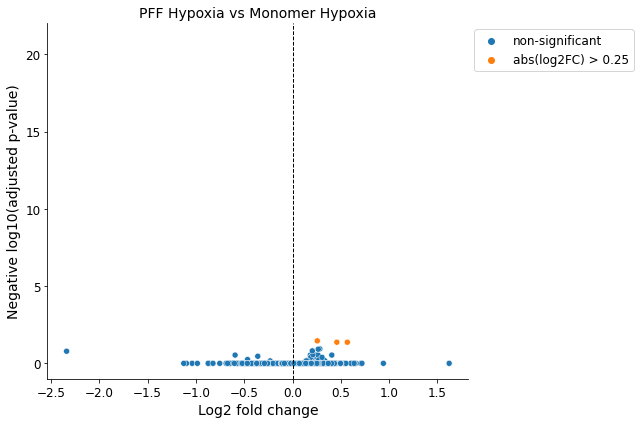

In [41]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
#to_annotate = res[res['padj'] < 0.05]
#for idx in range(to_annotate.shape[0]):
#    vals = to_annotate.iloc[idx]
#   axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.set_ylim((-1.0, 22.0))
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Hypoxia vs Monomer Hypoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_mono_norm.volcano.unlabeled.pdf')

In [42]:
print_cols = ['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
res[res['padj'] < 0.05].sort_values(by=['padj', 'log2FoldChange'], 
                                    ascending=[True, False]).set_index('common_name')[print_cols]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
common_name,,,,,,
Vapa,1509.474062,0.256799,0.054673,4.697016,0.000003,0.034979
Tmem160,312.910450,0.568226,0.128448,4.423793,0.000010,0.042834
Bri3,275.830472,0.459301,0.103268,4.447681,0.000009,0.042834


In [43]:
#res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_MonomerHypoxia.csv')

In [44]:
enrichr_res = run_enrichr(res, description='PFF Hypoxia vs Monomer Hypoxia',
                          gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                          'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020'], organism='Mouse',
                          max_qval=0.05, fc_threshold=0.25,
                          mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                          mitocarta_background='mmusculus_gene_ensembl', pval_col='padj', log2fc_col='log2FoldChange',
                          gene_col='unique_common_name')
print(enrichr_res.shape)
enrichr_res.head()

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Hypoxia, Enrichr Library: GO_Biological_Process_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Hypoxia, Enrichr Library: KEGG_2019_Mouse
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Hypoxia, Enrichr Library: MGI_Mammalian_Phenotype_Level_4_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Hypoxia, Enrichr Library: MSigDB_Hallmark_2020
INFO:gseapy:User Defined gene sets is given: ../ref_data/Mouse.MitoPathways3.0.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:Background: found 20618 genes
INFO:gseapy:No hits return, for gene set: Custom47675975240832
INFO:gseapy:User Defined gene sets is given: ../ref_data/chatterjee2022_de_gene_set.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all ann

No significant downgoing genes found.
(34, 12)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,direction,description
0,GO_Biological_Process_2021,positive regulation by host of viral genome re...,1/5,0.000750,0.006746,0.0,0.0,2499.125000,17982.858998,VAPA,upgoing,PFF Hypoxia vs Monomer Hypoxia
1,GO_Biological_Process_2021,negative regulation by host of viral genome re...,1/7,0.001050,0.006746,0.0,0.0,1665.916667,11427.001555,VAPA,upgoing,PFF Hypoxia vs Monomer Hypoxia
2,GO_Biological_Process_2021,positive regulation of viral release from host...,1/11,0.001649,0.006746,0.0,0.0,999.350000,6403.334808,VAPA,upgoing,PFF Hypoxia vs Monomer Hypoxia
3,GO_Biological_Process_2021,positive regulation by host of viral process (...,1/11,0.001649,0.006746,0.0,0.0,999.350000,6403.334808,VAPA,upgoing,PFF Hypoxia vs Monomer Hypoxia
4,GO_Biological_Process_2021,neutrophil degranulation (GO:0043312),2/481,0.001704,0.006746,0.0,0.0,81.494781,519.510999,VAPA;BRI3,upgoing,PFF Hypoxia vs Monomer Hypoxia


In [45]:
#enrichr_res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_MonomerHypoxia.enrichr_results.padjlt0.05.fcgt0.25.csv')

#### PFF hypoxia vs monomer normoxia

In [46]:
#dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','monomer_normoxia'], cooksCutoff=2.0)
dds.get_deseq_result(contrast=['exp_condition','PFF_hypoxia','monomer_normoxia'])
res = dds.deseq_result
res['log2FC_magnitude'] = numpy.absolute(res['log2FoldChange'])
res.sort_values(by=['padj', 'log2FC_magnitude'], ascending=[True, False]).head(50)

INFO:DESeq2:Using contrast: ['exp_condition', 'PFF_hypoxia', 'monomer_normoxia']


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
Vegfa_ENSMUSG00000023951.17,2768.039854,0.832126,0.049824,16.701183,1.284925e-62,1.702526e-58,Vegfa_ENSMUSG00000023951.17,0.832126
Dnajb1_ENSMUSG00000005483.10,1230.533187,-0.805541,0.073458,-10.965983,5.569176e-28,3.689579e-24,Dnajb1_ENSMUSG00000005483.10,0.805541
Kdr_ENSMUSG00000062960.10,281.581207,0.972438,0.092113,10.557020,4.713907e-26,2.081976e-22,Kdr_ENSMUSG00000062960.10,0.972438
Cxcl12_ENSMUSG00000061353.11,762.828855,1.166805,0.121589,9.596289,8.287478e-22,2.006103e-18,Cxcl12_ENSMUSG00000061353.11,1.166805
Ccdc117_ENSMUSG00000020482.4,431.345263,-0.676526,0.070568,-9.586819,9.084239e-22,2.006103e-18,Ccdc117_ENSMUSG00000020482.4,0.676526
Dedd2_ENSMUSG00000054499.9,434.414535,-0.541937,0.056474,-9.596183,8.296001e-22,2.006103e-18,Dedd2_ENSMUSG00000054499.9,0.541937
Slc5a3_ENSMUSG00000089774.2,859.709916,-0.684324,0.077342,-8.848030,8.907735e-19,1.686107e-15,Slc5a3_ENSMUSG00000089774.2,0.684324
Prss35_ENSMUSG00000033491.13,167.728685,0.802078,0.092655,8.656575,4.861496e-18,8.051853e-15,Prss35_ENSMUSG00000033491.13,0.802078
Hsph1_ENSMUSG00000029657.15,4310.264090,-0.594808,0.069104,-8.607495,7.467470e-18,1.099377e-14,Hsph1_ENSMUSG00000029657.15,0.594808
Hspa1a_ENSMUSG00000091971.3,322.049556,-2.034975,0.245161,-8.300572,1.036116e-16,1.372853e-13,Hspa1a_ENSMUSG00000091971.3,2.034975


In [47]:
res['common_name'] = [elt.split('_')[0] for elt in res['unique_common_name']]

In [48]:
pandas.concat([res.set_index('common_name').sort_values(by='stat', ascending=False).head(15),
               res.set_index('common_name').sort_values(by='stat', ascending=False).tail(15)])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,unique_common_name,log2FC_magnitude
common_name,,,,,,,,
Vegfa,2768.039854,0.832126,0.049824,16.701183,1.284925e-62,1.702526e-58,Vegfa_ENSMUSG00000023951.17,0.832126
Kdr,281.581207,0.972438,0.092113,10.557020,4.713907e-26,2.081976e-22,Kdr_ENSMUSG00000062960.10,0.972438
Cxcl12,762.828855,1.166805,0.121589,9.596289,8.287478e-22,2.006103e-18,Cxcl12_ENSMUSG00000061353.11,1.166805
Prss35,167.728685,0.802078,0.092655,8.656575,4.861496e-18,8.051853e-15,Prss35_ENSMUSG00000033491.13,0.802078
Tfrc,1650.884498,0.576662,0.070281,8.205105,2.303903e-16,2.775156e-13,Tfrc_ENSMUSG00000022797.16,0.576662
Ldha,2300.521208,0.488496,0.061572,7.933784,2.125674e-15,1.877678e-12,Ldha_ENSMUSG00000063229.15,0.488496
Slc6a6,1989.177707,0.323976,0.044693,7.248986,4.199034e-13,3.090955e-10,Slc6a6_ENSMUSG00000030096.8,0.323976
Casq2,84.396713,0.794771,0.110235,7.209775,5.604422e-13,3.908347e-10,Casq2_ENSMUSG00000027861.13,0.794771
Abcc9,252.263130,0.473637,0.069102,6.854208,7.170848e-12,4.750687e-09,Abcc9_ENSMUSG00000030249.15,0.473637


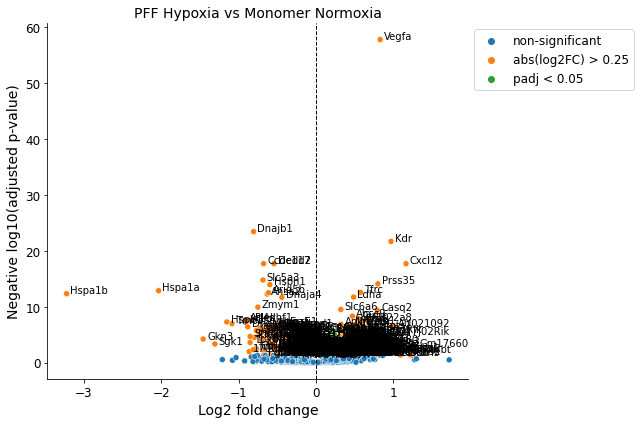

In [49]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
to_annotate = res[res['padj'] < 0.05]
for idx in range(to_annotate.shape[0]):
    vals = to_annotate.iloc[idx]
    axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Hypoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_mono_norm.volcano.pdf')

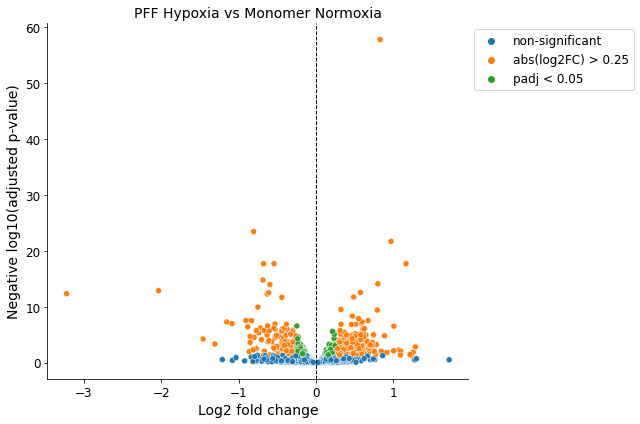

In [50]:
#make a volcano plot
res['neg_log10_padj'] = numpy.absolute(numpy.log10(res['padj']))
res['sig_status'] = 'non-significant'
res.loc[res['padj'] < 0.05, 'sig_status'] = 'padj < 0.05'
res.loc[(res['padj'] < 0.05) & (res['log2FC_magnitude'] > 0.25), 'sig_status'] = 'abs(log2FC) > 0.25'

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,6))
seaborn.scatterplot(data=res, x='log2FoldChange', y='neg_log10_padj', hue='sig_status', ax=axes)
#to_annotate = res[res['padj'] < 0.05]
#for idx in range(to_annotate.shape[0]):
#    vals = to_annotate.iloc[idx]
#   axes.annotate(vals['common_name'], (vals['log2FoldChange'] + 0.05, vals['neg_log10_padj'] + 0.05), fontsize=10)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(labelsize=12)
axes.axvline(0, color='k', linestyle='--', linewidth=1)
axes.set_title('PFF Hypoxia vs Monomer Normoxia', fontsize=14)
axes.set_xlabel('Log2 fold change', fontsize=14)
axes.set_ylabel('Negative log10(adjusted p-value)', fontsize=14)
axes.legend(bbox_to_anchor=[1,1], loc='upper left', fontsize=12)
fig.tight_layout()
#fig.savefig('./de_analysis.batch_correction.no_dispersion_prefilter.pff_hyp_vs_mono_norm.volcano.unlabeled.pdf')

In [51]:
#res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_MonomerNormoxia.csv')

In [52]:
enrichr_res = run_enrichr(res, description='PFF Hypoxia vs Monomer Normoxia',
                          gene_sets=['GO_Biological_Process_2021', 'KEGG_2019_Mouse',
                          'MGI_Mammalian_Phenotype_Level_4_2021', 'MSigDB_Hallmark_2020'], organism='Mouse',
                          max_qval=0.05, fc_threshold=0.25,
                          mitocarta_gmt_path='../ref_data/Mouse.MitoPathways3.0.gmt',
                          mitocarta_background='mmusculus_gene_ensembl', pval_col='padj', log2fc_col='log2FoldChange',
                          gene_col='unique_common_name')
print(enrichr_res.shape)
enrichr_res.head()

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Normoxia, Enrichr Library: GO_Biological_Process_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Normoxia, Enrichr Library: KEGG_2019_Mouse
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Normoxia, Enrichr Library: MGI_Mammalian_Phenotype_Level_4_2021
INFO:gseapy:Analysis name: PFF Hypoxia vs Monomer Normoxia, Enrichr Library: MSigDB_Hallmark_2020
INFO:gseapy:User Defined gene sets is given: ../ref_data/Mouse.MitoPathways3.0.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensembl
INFO:gseapy:Background: found 20618 genes
INFO:gseapy:User Defined gene sets is given: ../ref_data/chatterjee2022_de_gene_set.gmt
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Using all annotated genes with GO_ID as background: mmusculus_gene_ensem

(7040, 12)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,direction,description
0,GO_Biological_Process_2021,vasculogenesis (GO:0001570),10/33,4.825397e-11,1.054832e-07,0.0,0.0,28.406760,674.789602,PDGFRB;EGFL7;TGFB1;SOX17;SOX18;CAV1;KDR;ADM;TG...,upgoing,PFF Hypoxia vs Monomer Normoxia
1,GO_Biological_Process_2021,blood vessel morphogenesis (GO:0048514),11/56,8.608859e-10,9.409483e-07,0.0,0.0,16.006222,334.098823,EGFL7;FLT1;TGFB1;SOX17;SOX18;FLT4;CAV1;KDR;ADM...,upgoing,PFF Hypoxia vs Monomer Normoxia
2,GO_Biological_Process_2021,regulation of cell population proliferation (G...,36/764,3.417137e-09,2.489954e-06,0.0,0.0,3.409570,66.467744,ACVRL1;FLT1;TFRC;TGFB1I1;FLT4;ETS1;HHEX;ADAMTS...,upgoing,PFF Hypoxia vs Monomer Normoxia
3,GO_Biological_Process_2021,hemopoiesis (GO:0030097),12/94,2.474505e-08,1.352317e-05,0.0,0.0,9.596378,168.077112,BMP4;LYL1;MEIS1;FLT1;JAG1;TGFB1;FLT4;KDR;CD34;...,upgoing,PFF Hypoxia vs Monomer Normoxia
4,GO_Biological_Process_2021,positive regulation of cellular process (GO:00...,27/625,1.862349e-06,7.048203e-04,0.0,0.0,3.035099,40.044105,FLT1;FLT4;NOXO1;CST7;ETS1;CXCL16;KDR;FBXO5;IER...,upgoing,PFF Hypoxia vs Monomer Normoxia


In [53]:
#enrichr_res.to_csv('./deseq2.batch_correction.no_dispersion_prefilter.PFFHypoxia_vs_MonomerNormoxia.enrichr_results.padjlt0.05.fcgt0.25.csv')